In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import UnivariateSpline
from scipy.stats import shapiro, normaltest
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
# Load the data
data = pd.read_csv('MAHA_YIELD.csv')

In [123]:
# List of columns to plot
columns = ['AMPARAYIELDKGperHA', 'ANURADHAPURAYIELDKGperHA', 'POLLONARUWAYIELDKGperHA']
labels = ['Ampara Yield (kg/ha)', 'Anuradhapura Yield (kg/ha)', 'Pollonnaruwa Yield (kg/ha)']

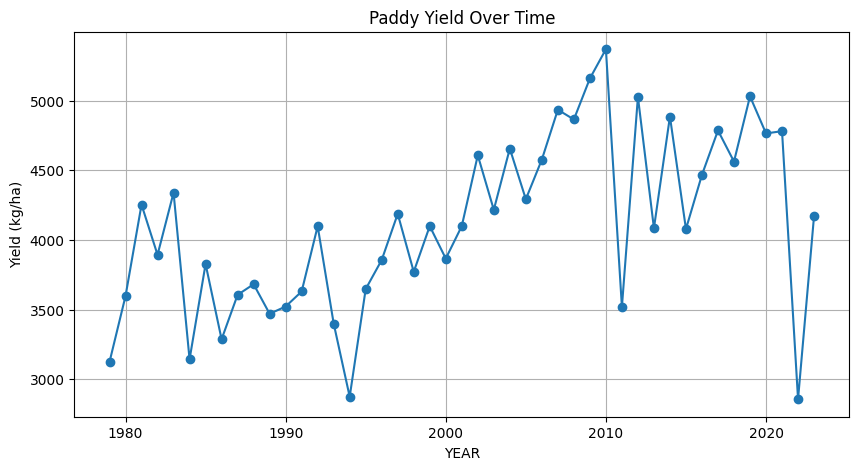

In [124]:
# Visualize the original data
plt.figure(figsize=(10, 5))
plt.plot(data['YEAR'], data['AMPARAYIELDKGperHA'], marker='o')
plt.title('Paddy Yield Over Time')
plt.xlabel('YEAR')
plt.ylabel('Yield (kg/ha)')
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

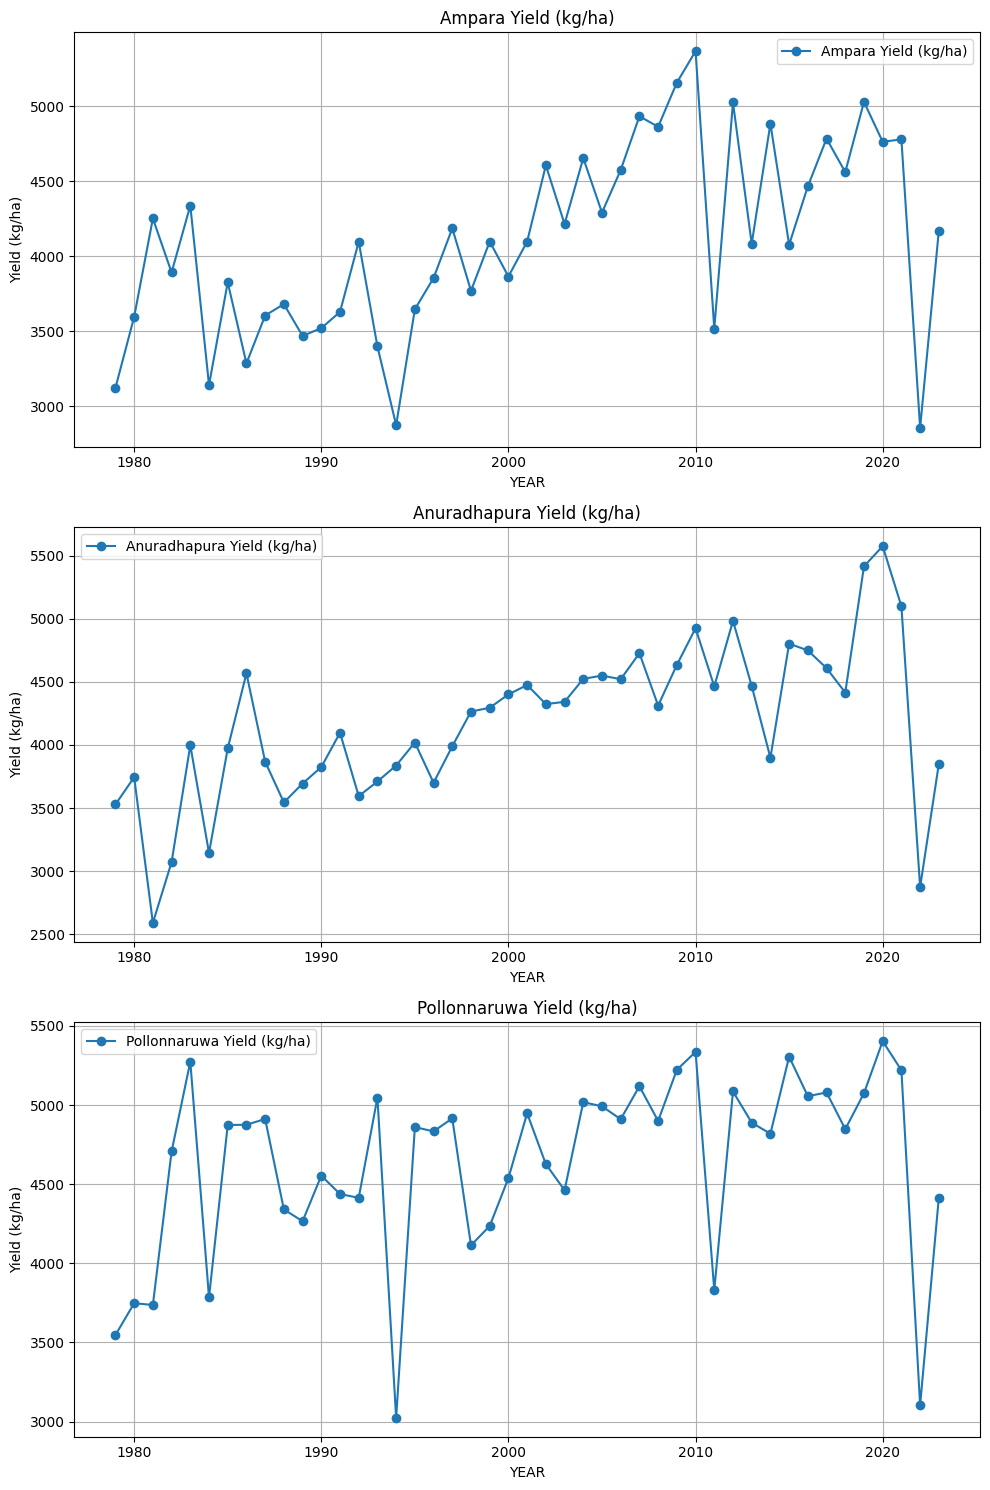

In [125]:
# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Loop through each column and plot in separate subplots
for ax, col, label in zip(axs, columns, labels):
    ax.plot(data['YEAR'], data[col], marker='o', label=label)
    ax.set_title(label)
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Yield (kg/ha)')
    ax.grid()
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show

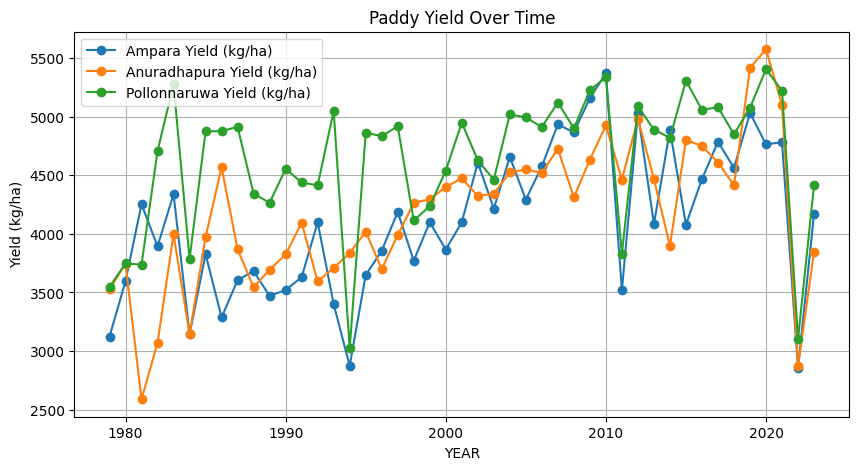

In [126]:
# Loop through each column and plot
plt.figure(figsize=(10, 5))
for col, label in zip(columns, labels):
    plt.plot(data['YEAR'], data[col], marker='o', label=label)

# Adding titles and labels
plt.title('Paddy Yield Over Time')
plt.xlabel('YEAR')
plt.ylabel('Yield (kg/ha)')
plt.grid()
plt.legend()
plt.show()

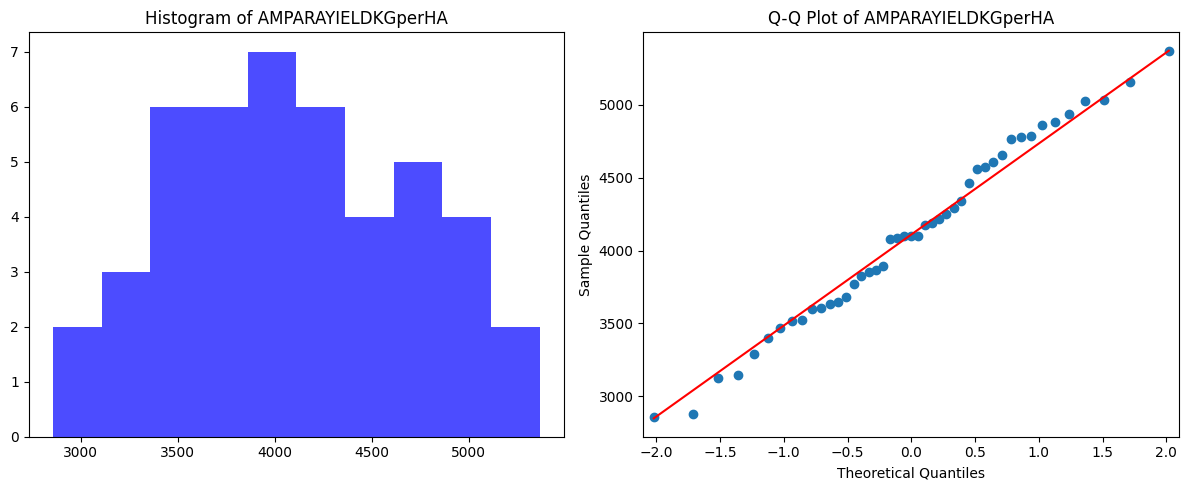

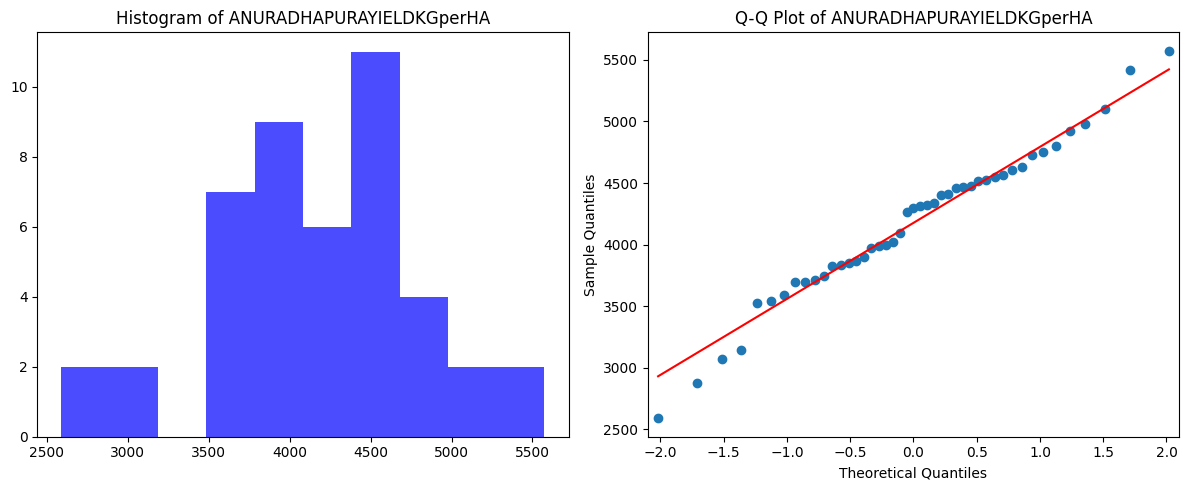

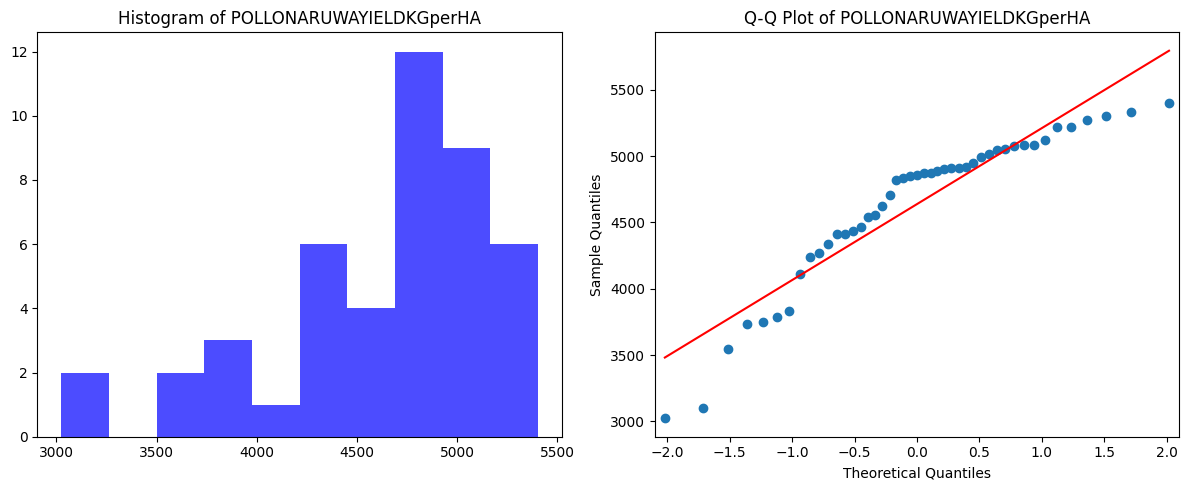

In [127]:
# Data Distribution Analysis

# Visual Inspection: Histograms and Q-Q plots for normality check
for col in columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(data[col], bins=10, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sm.qqplot(data[col], line='s', ax=plt.gca())
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

In [128]:
# Statistical Tests for Normality (Shapiro-Wilk Test)
for col in columns:
    stat, p_value = shapiro(data[col])
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p-value={p_value:.3f}')

# Normality test using D'Agostino's K-squared test
for col in columns:
    stat, p_value = normaltest(data[col])
    print(f'D\'Agostino\'s K-squared Test for {col}: Statistics={stat:.3f}, p-value={p_value:.3f}')

Shapiro-Wilk Test for AMPARAYIELDKGperHA: Statistics=0.981, p-value=0.661
Shapiro-Wilk Test for ANURADHAPURAYIELDKGperHA: Statistics=0.984, p-value=0.791
Shapiro-Wilk Test for POLLONARUWAYIELDKGperHA: Statistics=0.890, p-value=0.000
D'Agostino's K-squared Test for AMPARAYIELDKGperHA: Statistics=1.809, p-value=0.405
D'Agostino's K-squared Test for ANURADHAPURAYIELDKGperHA: Statistics=1.046, p-value=0.593
D'Agostino's K-squared Test for POLLONARUWAYIELDKGperHA: Statistics=10.536, p-value=0.005


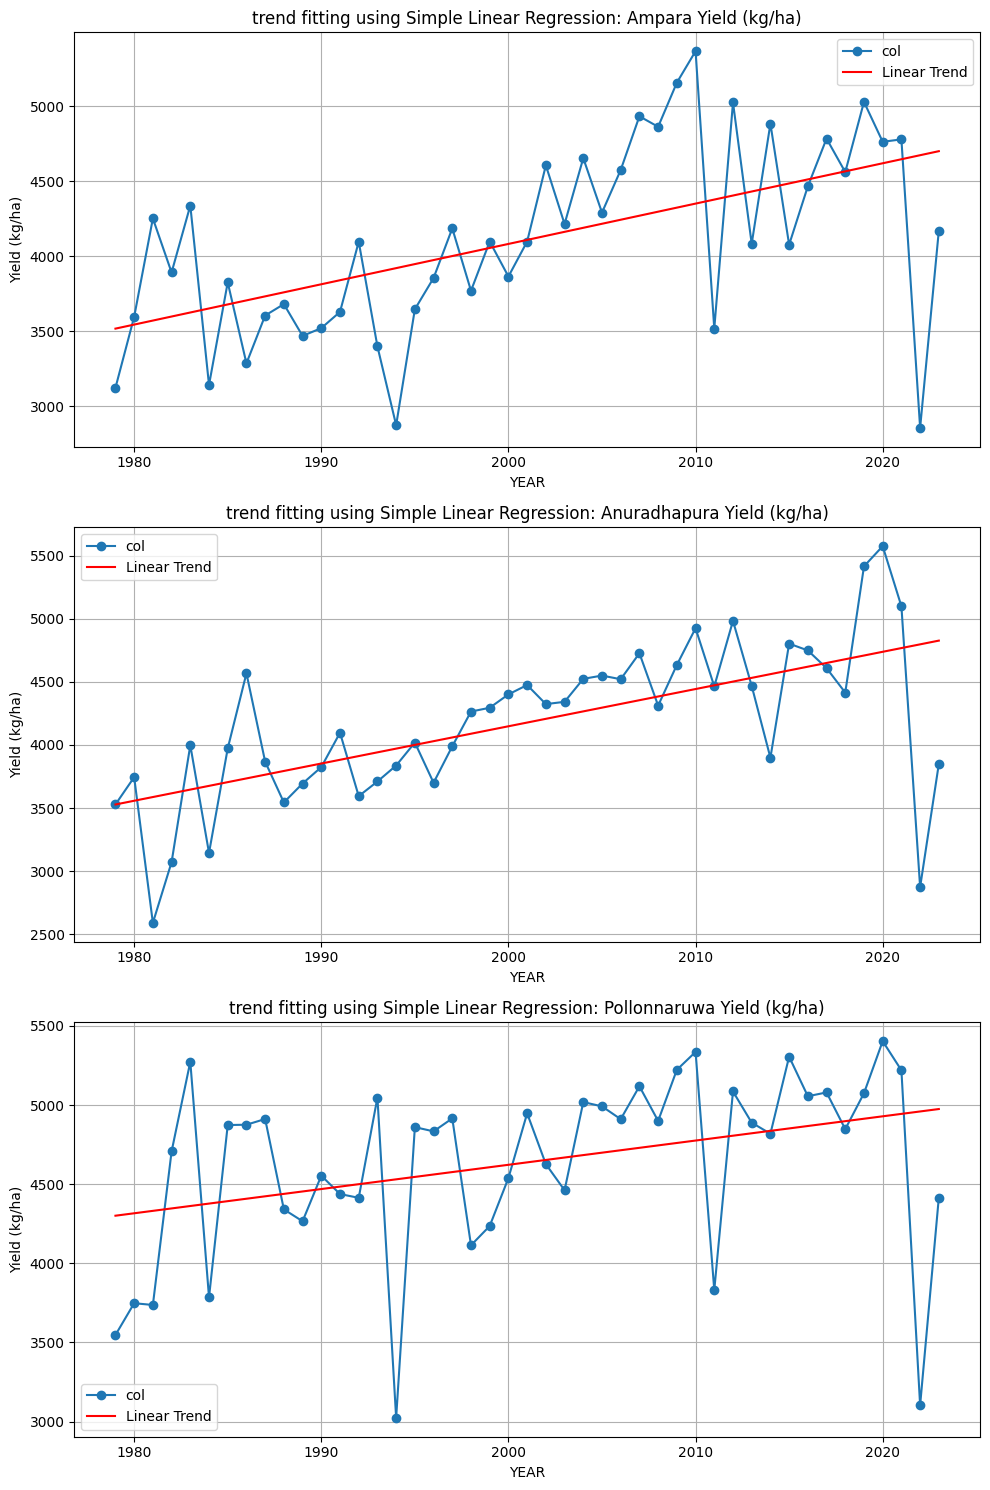

In [129]:
# Create subplots for each yield dataset
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))

# Loop through each column for regression and plotting
for ax, col, label in zip(axs, columns, labels):
    # Prepare the data for regression
    X = sm.add_constant(data['YEAR'])
    model = sm.OLS(data[col], X).fit()

    # Get predictions and residuals
    data['Trend'] = model.predict(X)

    # Plotting results
    ax.plot(data['YEAR'], data[col], label='col', marker='o')
    ax.plot(data['YEAR'], data['Trend'], label='Linear Trend', color='red')

    # Adding titles and labels for each subplot
    ax.set_title(f'trend fitting using Simple Linear Regression: {label}')
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Yield (kg/ha)')
    ax.legend()
    ax.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [130]:
# Create a list to store performance metrics
metrics = []

# Loop to calculate performance metrics
for col, label in zip(columns, labels):
    X = sm.add_constant(data['YEAR'])
    model = sm.OLS(data[col], X).fit()

    # Get predictions and residuals
    data['Trend'] = model.predict(X)

    rmse = np.sqrt(mean_squared_error(data[col], data['Trend']))
    mae = mean_absolute_error(data[col], data['Trend'])

    # Calculate Nash-Sutcliffe Efficiency (NSE)
    nse = 1 - (np.sum((data[col] - data['Trend']) ** 2) / np.sum((data[col] - np.mean(data[col])) ** 2))

    # Calculate Index of Agreement (IOA)
    ioa = 1 - ((np.sum(np.abs(data[col] - data['Trend']))**2) /
               (np.sum((np.abs(data['Trend'] - np.mean(data[col]))) + (np.abs(data[col] - np.mean(data[col]))))**2))

    # Append the metrics to the list
    metrics.append({'Label': label, 'RMSE': rmse, 'MAE': mae, 'NSE': nse, 'IOA': ioa})

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)


                        Label        RMSE         MAE       NSE       IOA
0        Ampara Yield (kg/ha)  518.199465  391.807753  0.312177  0.770716
1  Anuradhapura Yield (kg/ha)  483.480387  336.622917  0.385730  0.834868
2  Pollonnaruwa Yield (kg/ha)  537.050527  402.136419  0.120683  0.592855


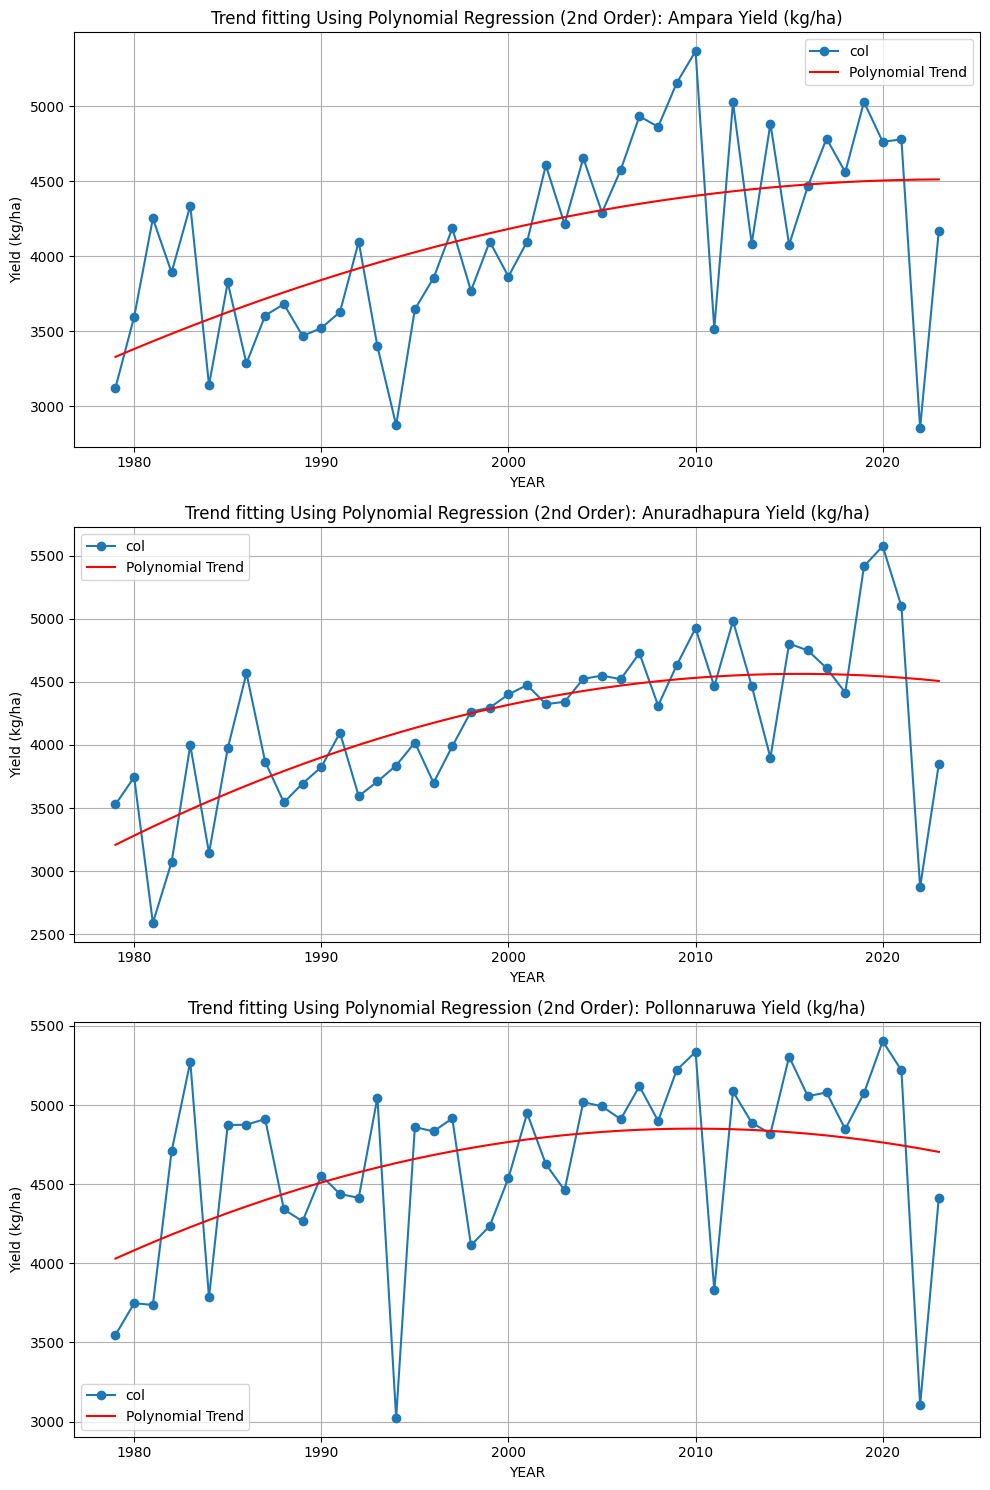

In [131]:
# Create subplots for each yield dataset
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))

# Loop through each column for polynomial regression and plotting
for ax, col, label in zip(axs, columns, labels):
    # Prepare polynomial features (2nd degree)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(data[['YEAR']])

    # Fit the polynomial regression model
    model_poly = LinearRegression().fit(X_poly, data[col])

    # Predictions and residuals
    data['Trend_Poly'] = model_poly.predict(X_poly)

    # Plotting results
    ax.plot(data['YEAR'], data[col], label='col', marker='o')
    ax.plot(data['YEAR'], data['Trend_Poly'], label='Polynomial Trend', color='red')

    # Adding titles and labels for each subplot
    ax.set_title(f'Trend fitting Using Polynomial Regression (2nd Order): {label}')
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Yield (kg/ha)')
    ax.legend()
    ax.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [132]:
# Create a list to store performance metrics
metrics = []

# Loop to calculate performance metrics for each column
for col, label in zip(columns, labels):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data[col], data['Trend_Poly']))

    # Calculate MAE
    mae = mean_absolute_error(data[col], data['Trend_Poly'])

    # Calculate NSE
    nse = 1 - (np.sum((data[col] - data['Trend_Poly']) ** 2) /
           np.sum((data[col] - np.mean(data[col])) ** 2))

    # Calculate IOA
    ioa = 1 - (np.sum(np.abs(data[col] - data['Trend_Poly'])**2) /
            np.sum((np.abs(data['Trend_Poly'] - np.mean(data[col]))) +
                    np.abs(data[col] - np.mean(data[col])))**2)

    # Append the metrics to the list
    metrics.append({'Label': label, 'RMSE': rmse, 'MAE': mae, 'NSE': nse, 'IOA': ioa})

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)

                        Label        RMSE         MAE       NSE       IOA
0        Ampara Yield (kg/ha)  750.618024  602.330511 -0.443182  0.988618
1  Anuradhapura Yield (kg/ha)  676.492839  559.486397 -0.202618  0.989204
2  Pollonnaruwa Yield (kg/ha)  521.199669  387.137144  0.171822  0.985900


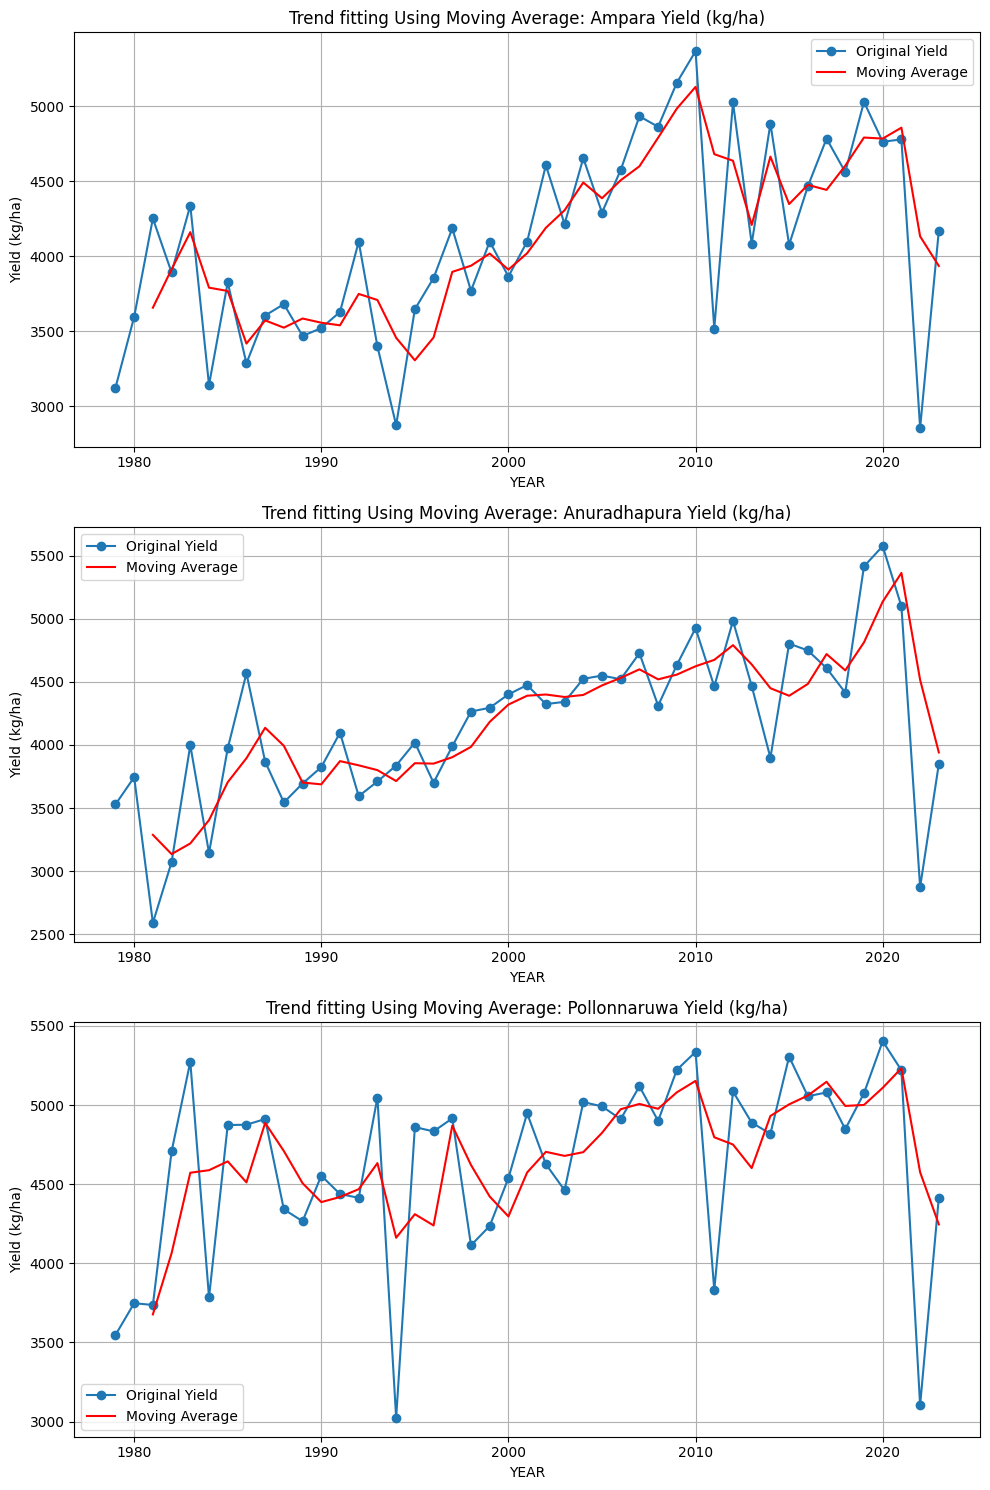

In [133]:

# Create subplots for each yield dataset
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))

# Loop through each column for moving average and plotting
for ax, col, label in zip(axs, columns, labels):
    # Calculate moving average with a window size of 3 YEARs
    data['Moving_Avg'] = data[col].rolling(window=3).mean()

    # Plotting results
    ax.plot(data['YEAR'], data[col], label='Original Yield', marker='o')
    ax.plot(data['YEAR'], data['Moving_Avg'], label='Moving Average', color='red')


    # Adding titles and labels for each subplot
    ax.set_title(f'Trend fitting Using Moving Average: {label}')
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Yield (kg/ha)')
    ax.legend()
    ax.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [134]:
# Create a list to store performance metrics
metrics = []

# Loop to calculate performance metrics for each column
for col, label in zip(columns, labels):
    # Ensure that moving average does not contain NaN values
    data['Moving_Avg'] = data[col].rolling(window=3, min_periods=1).mean()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data[col], data['Moving_Avg']))

    # Calculate MAE
    mae = mean_absolute_error(data[col], data['Moving_Avg'])

    # Calculate NSE
    nse = 1 - (np.sum((data[col] - data['Moving_Avg']) ** 2) /
               np.sum((data[col] - np.mean(data[col])) ** 2))

    # Calculate IOA
    ioa = 1 - (np.sum(np.abs(data[col] - data['Moving_Avg'])**2) /
               np.sum((np.abs(data['Moving_Avg'] - np.mean(data[col]))) +
                      np.abs(data[col] - np.mean(data[col])))**2)

    # Append the metrics to the list
    metrics.append({'Label': label, 'RMSE': rmse, 'MAE': mae, 'NSE': nse, 'IOA': ioa})

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)


                        Label        RMSE         MAE       NSE       IOA
0        Ampara Yield (kg/ha)  359.619264  244.406670  0.668740  0.996895
1  Anuradhapura Yield (kg/ha)  380.043742  256.017777  0.620450  0.996254
2  Pollonnaruwa Yield (kg/ha)  431.962587  298.414077  0.431137  0.992796


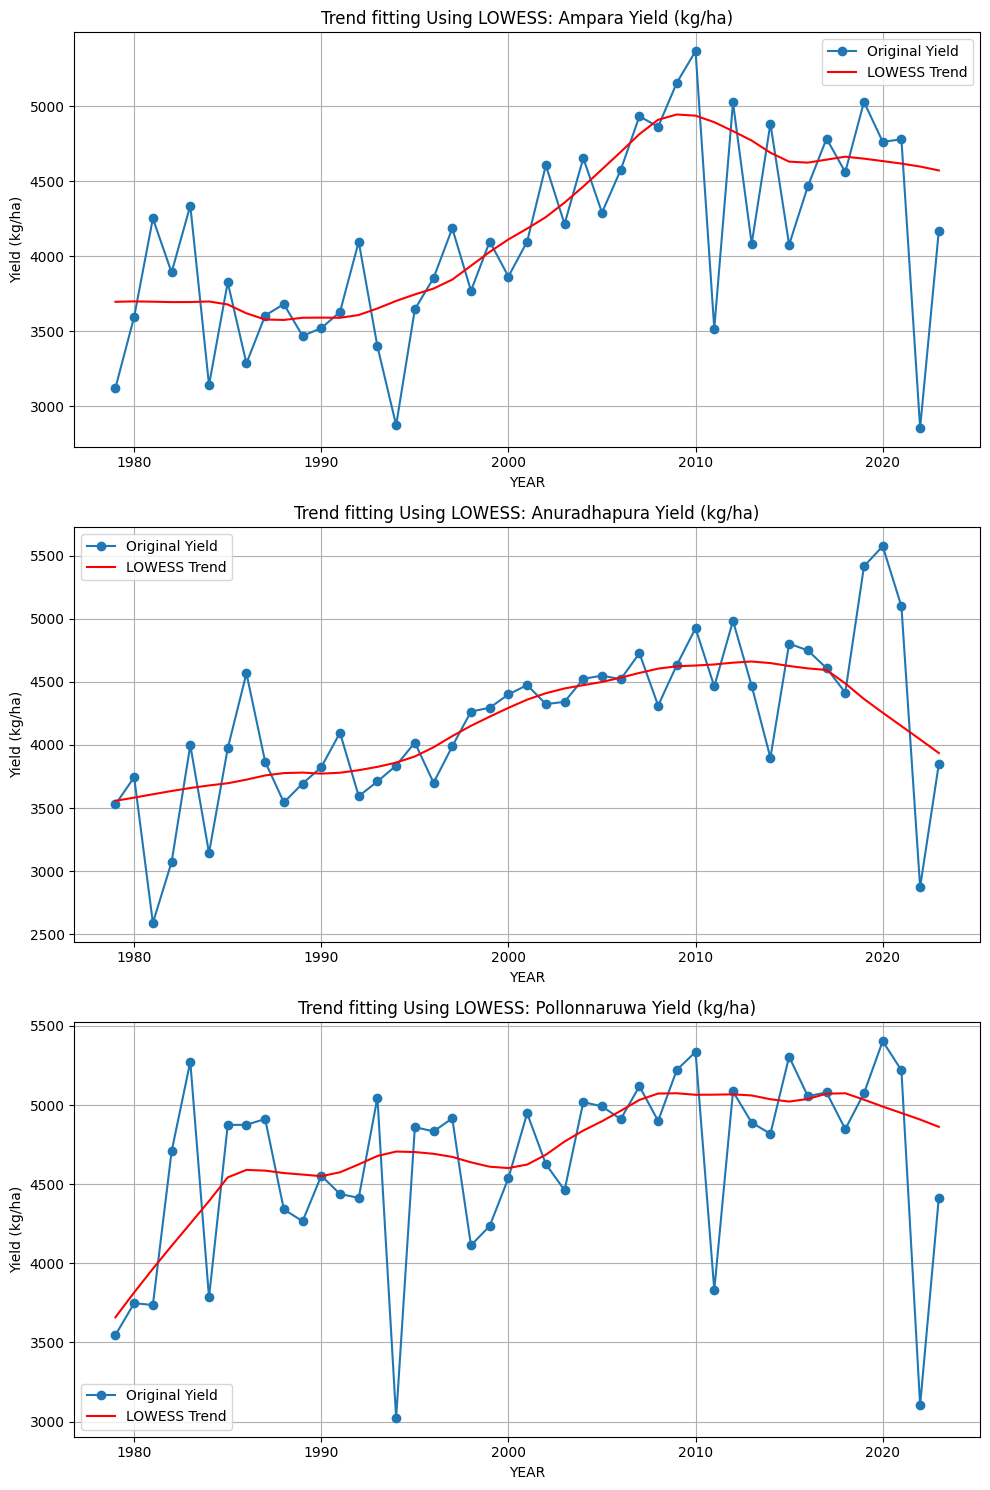

In [135]:
# Create subplots for each yield dataset
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))

# Loop through each column for LOWESS smoothing and plotting
for ax, col, label in zip(axs, columns, labels):
    # Apply LOWESS smoothing
    lowess = sm.nonparametric.lowess(data[col], data['YEAR'], frac=0.3)
    data['Trend_LOWESS'] = lowess[:, 1]

    # Plotting results
    ax.plot(data['YEAR'], data[col], label='Original Yield', marker='o')
    ax.plot(data['YEAR'], data['Trend_LOWESS'], label='LOWESS Trend', color='red')


    # Adding titles and labels for each subplot
    ax.set_title(f'Trend fitting Using LOWESS: {label}')
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Yield (kg/ha)')
    ax.legend()
    ax.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [136]:
# Create a list to store performance metrics
metrics = []

for col, label in zip(columns, labels):
    # Apply LOWESS smoothing
    lowess = sm.nonparametric.lowess(data[col], data['YEAR'], frac=0.3)
    data['Trend_LOWESS'] = lowess[:, 1]

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(data[col], data['Trend_LOWESS']))
    mae = mean_absolute_error(data[col], data['Trend_LOWESS'])
    nse = 1 - (np.sum((data[col] - data['Trend_LOWESS']) ** 2) /
               np.sum((data[col] - np.mean(data[col])) ** 2))
    ioa = 1 - (np.sum(np.abs(data[col] - data['Trend_LOWESS'])**2) /
               np.sum((np.abs(data['Trend_LOWESS'] - np.mean(data[col]))) +
                      np.abs(data[col] - np.mean(data[col])))**2)

    # Append metrics
    metrics.append({'Label': label, 'RMSE': rmse, 'MAE': mae, 'NSE': nse, 'IOA': ioa})

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print metrics
print(metrics_df)


                        Label        RMSE         MAE       NSE       IOA
0        Ampara Yield (kg/ha)  459.448857  316.232972  0.459299  0.995153
1  Anuradhapura Yield (kg/ha)  449.172467  294.945137  0.469815  0.993707
2  Pollonnaruwa Yield (kg/ha)  508.907276  330.306790  0.210426  0.989056


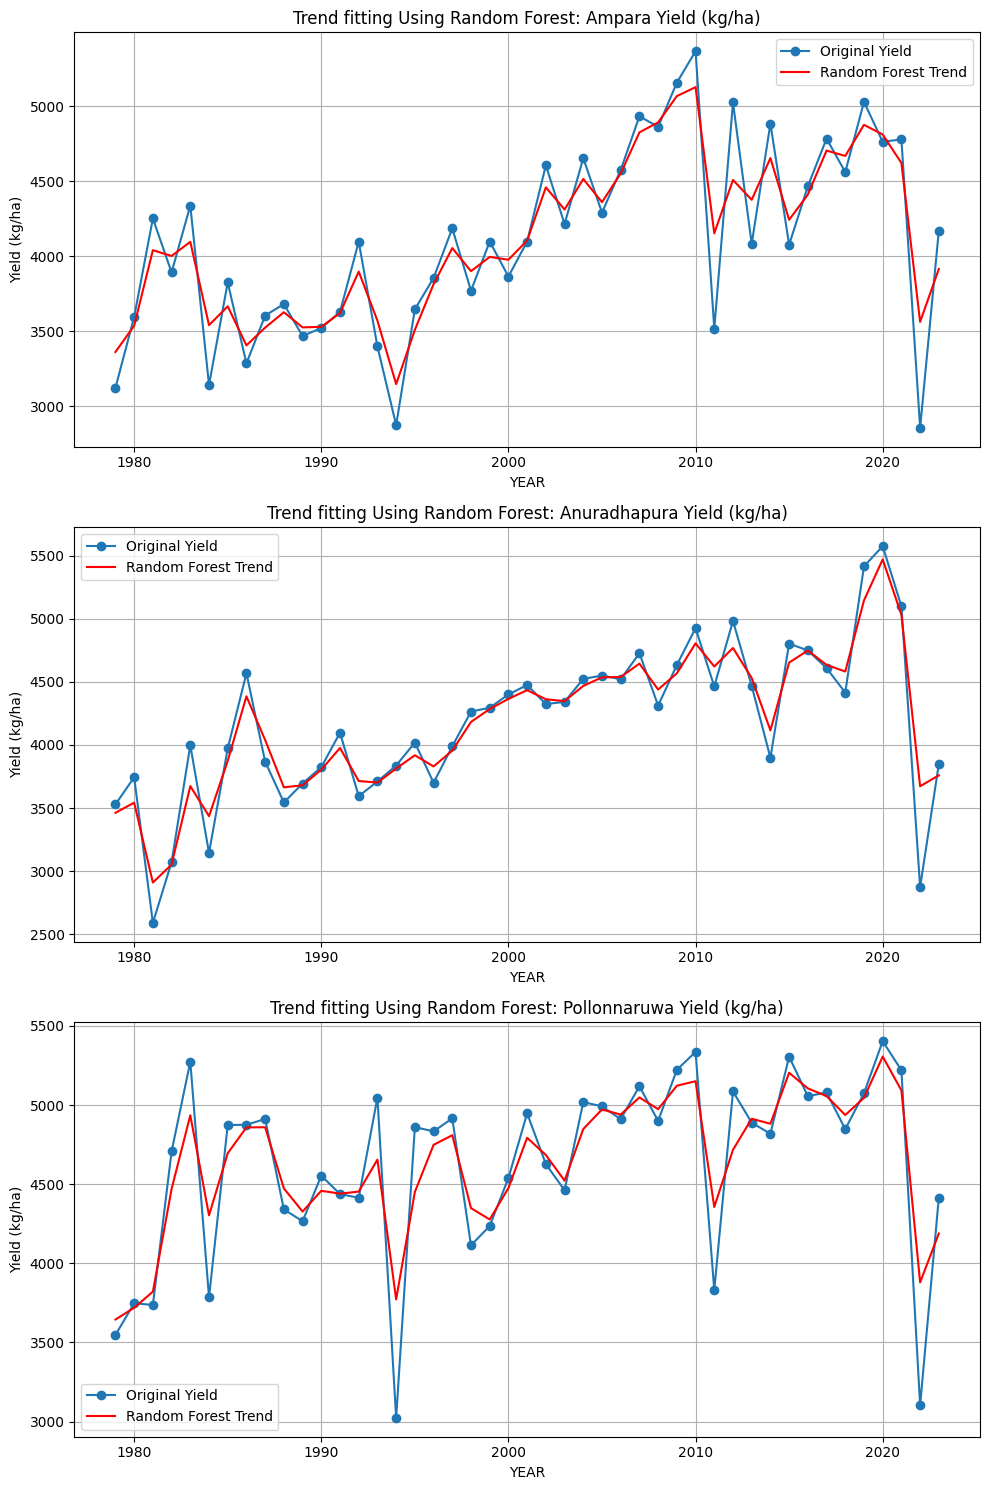

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Create subplots for each yield dataset
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))

# Loop through each column for Random Forest and plotting
for ax, col, label in zip(axs, columns, labels):
    # Prepare the data for Random Forest
    X = data[['YEAR']]
    y = data[col]

    # Fit the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Get predictions from Random Forest model
    data['Trend_RF'] = rf_model.predict(X)

    # Plotting results for Random Forest
    ax.plot(data['YEAR'], data[col], label='Original Yield', marker='o')
    ax.plot(data['YEAR'], data['Trend_RF'], label='Random Forest Trend', color='red')


    # Adding titles and labels for each subplot
    ax.set_title(f'Trend fitting Using Random Forest: {label}')
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Yield (kg/ha)')
    ax.legend()
    ax.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




In [138]:
# Create a list to store performance metrics
rf_metrics = []

# Loop through each column for Random Forest and calculate performance metrics
for col, label in zip(columns, labels):
    # Prepare the data for Random Forest
    X = data[['YEAR']].values  # Features
    y = data[col].values       # Target (actual values)

    # Fit the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Get predictions
    data['Trend_RF'] = rf_model.predict(X)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y, data['Trend_RF']))
    mae = mean_absolute_error(y, data['Trend_RF'])
    nse = 1 - (np.sum((y - data['Trend_RF']) ** 2) / np.sum((y - np.mean(y)) ** 2))
    ioa = 1 - (np.sum(np.abs(y - data['Trend_RF'])**2) /
               np.sum((np.abs(data['Trend_RF'] - np.mean(y))) + np.abs(y - np.mean(y)))**2)

    # Append metrics to the list
    rf_metrics.append({'Label': label, 'RMSE': rmse, 'MAE': mae, 'NSE': nse, 'IOA': ioa})

# Convert metrics to a DataFrame for better visualization
rf_metrics_df = pd.DataFrame(rf_metrics)

# Print the metrics table
print(rf_metrics_df)


                        Label        RMSE         MAE       NSE       IOA
0        Ampara Yield (kg/ha)  221.909552  164.418402  0.873865  0.998800
1  Anuradhapura Yield (kg/ha)  179.334517  119.758134  0.915486  0.999208
2  Pollonnaruwa Yield (kg/ha)  245.870883  164.193556  0.815698  0.997915


In [139]:
pip install pandas openpyxl

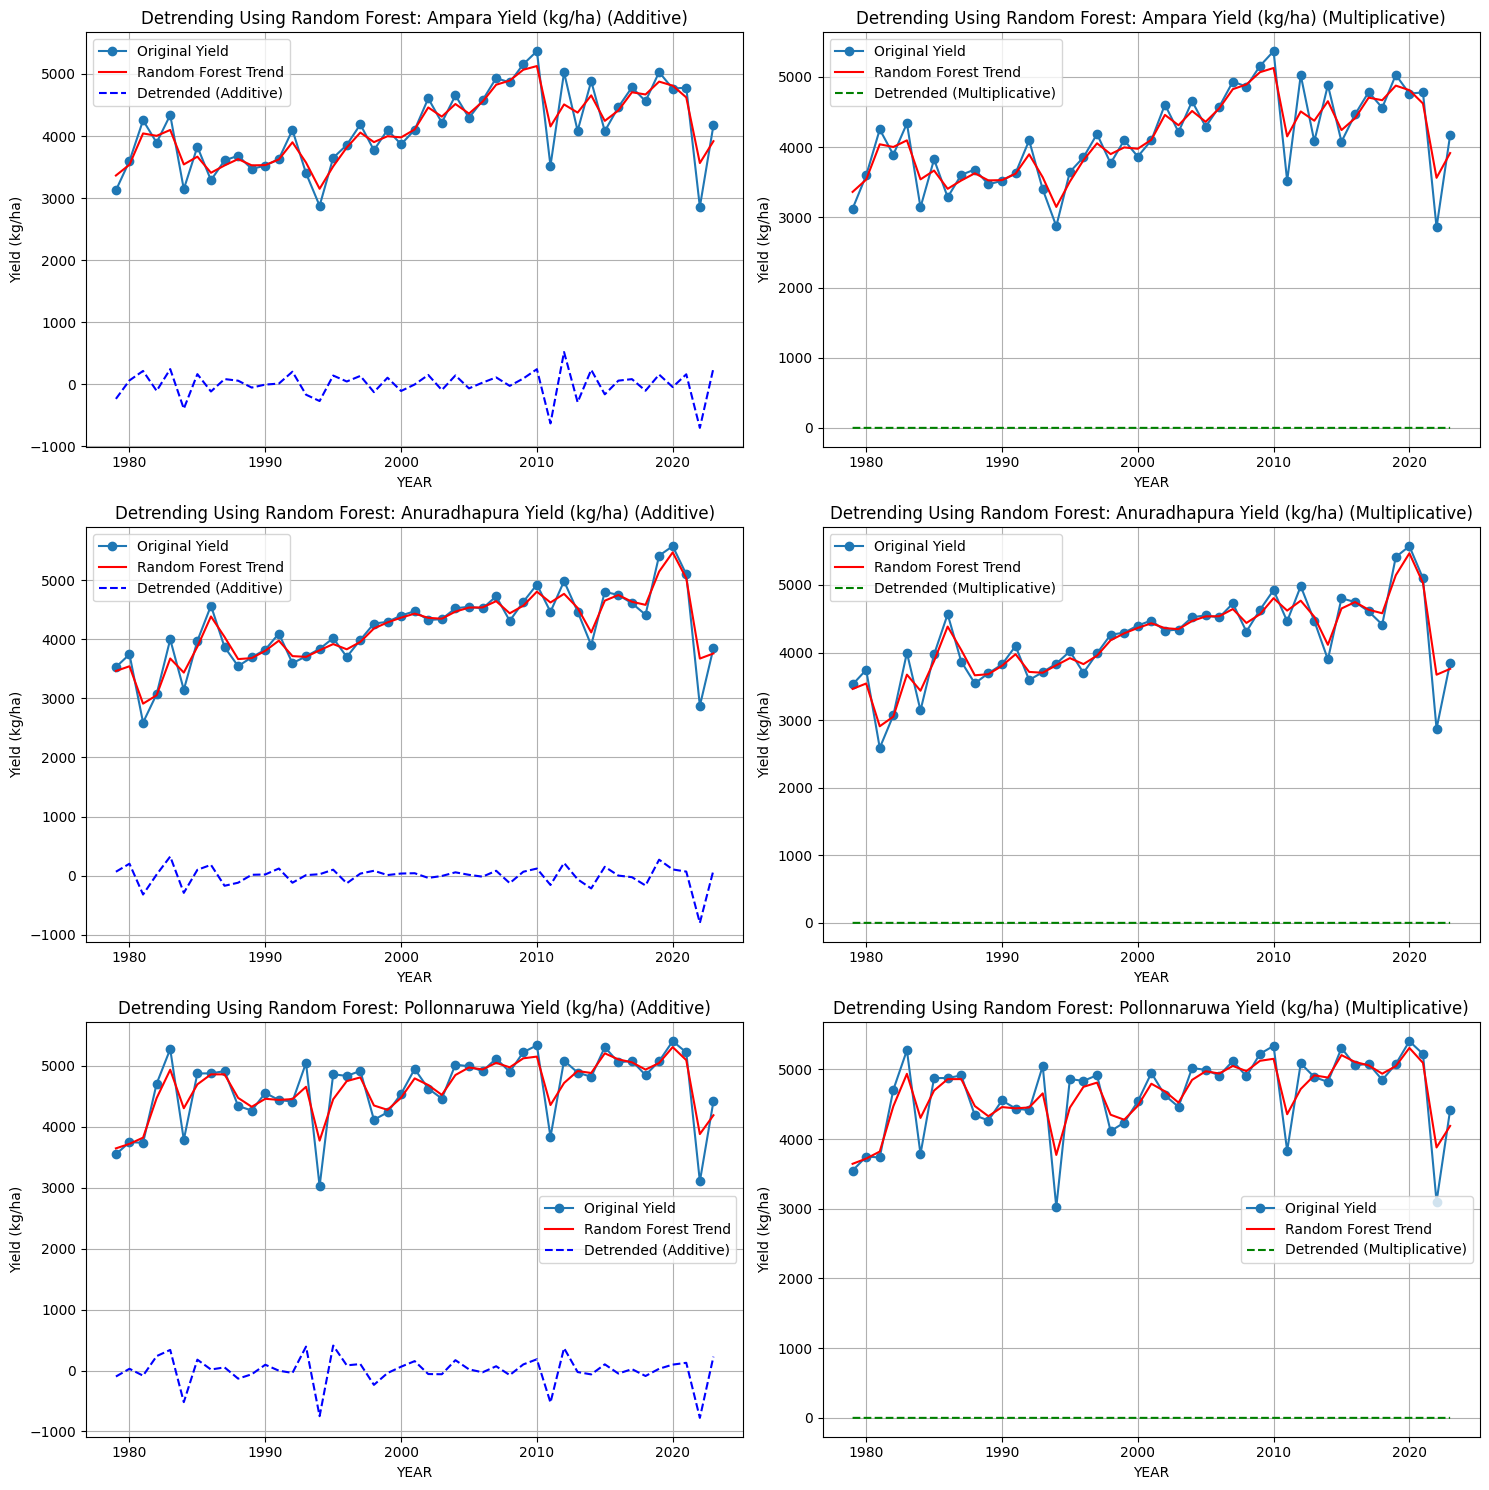

All detrended values saved to detrended_all_districts_MAHA.xlsx


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data' is your DataFrame with a 'YEAR' column and multiple district yield columns
# Example: columns = ['District1', 'District2', 'District3'], labels = ['District 1', 'District 2', 'District 3']

# Create an empty DataFrame to hold results
detrended_results = pd.DataFrame()

# Create subplots for each yield dataset
fig, axs = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, 15))

for ax_row, col, label in zip(axs, columns, labels):
    X = data[['YEAR']]
    y = data[col]

    # Fit Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Get predictions (Trend)
    data['Trend_RF'] = rf_model.predict(X)

    # Additive Detrending
    data['Detrended_Additive'] = data[col] - data['Trend_RF']

    # Multiplicative Detrending
    data['Detrended_Multiplicative'] = data[col] / data['Trend_RF']

    # Append results to the results DataFrame in the desired format
    detrended_results['YEAR'] = data['YEAR']
    detrended_results[f'Actual Yield ({label})'] = data[col]

    # Include the trend values in the output DataFrame
    detrended_results[f'Trend ({label})'] = data['Trend_RF']

    detrended_results[f'Detrended Additive ({label})'] = data['Detrended_Additive']
    detrended_results[f'Detrended Multiplicative ({label})'] = data['Detrended_Multiplicative']

    # Plotting results for Additive Detrending
    ax_row[0].plot(data['YEAR'], data[col], label='Original Yield', marker='o')
    ax_row[0].plot(data['YEAR'], data['Trend_RF'], label='Random Forest Trend', color='red')
    ax_row[0].plot(data['YEAR'], data['Detrended_Additive'], label='Detrended (Additive)', color='blue', linestyle='--')

    # Plotting results for Multiplicative Detrending
    ax_row[1].plot(data['YEAR'], data[col], label='Original Yield', marker='o')
    ax_row[1].plot(data['YEAR'], data['Trend_RF'], label='Random Forest Trend', color='red')
    ax_row[1].plot(data['YEAR'], data['Detrended_Multiplicative'], label='Detrended (Multiplicative)', color='green', linestyle='--')

    # Adding titles and labels for each subplot
    ax_row[0].set_title(f'Detrending Using Random Forest: {label} (Additive)')
    ax_row[0].set_xlabel('YEAR')
    ax_row[0].set_ylabel('Yield (kg/ha)')
    ax_row[0].legend()
    ax_row[0].grid()

    ax_row[1].set_title(f'Detrending Using Random Forest: {label} (Multiplicative)')
    ax_row[1].set_xlabel('YEAR')
    ax_row[1].set_ylabel('Yield (kg/ha)')
    ax_row[1].legend()
    ax_row[1].grid()

plt.tight_layout()
plt.show()

# Save all detrended values to a single Excel file
output_file = 'detrended_all_districts_MAHA.xlsx'
detrended_results.to_excel(output_file, index=False)
print(f'All detrended values saved to {output_file}')
